In [1]:
%matplotlib notebook
#%matplotlib inline
import numpy as np
import torch
import joblib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Run 1

In [2]:
losses_1 = joblib.load("results/goal_cond/from_start_standard/losses.pkl")

In [3]:
losses_1.keys()

dict_keys(['std_distance_empirical', 'G', 'avg_distance_empirical', 'big_eval_std_distance', 'big_eval_avg_distance', 'D', 'avg_distance', 'std_distance'])

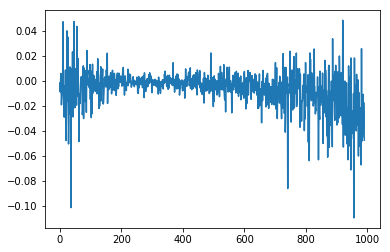

In [4]:
plt.plot(losses_1["D"][::1000])

not as stable as I'd like...

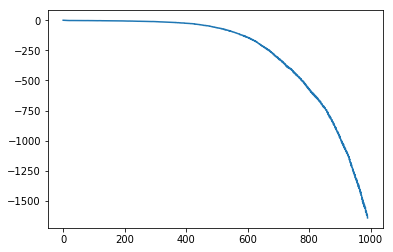

In [5]:
plt.plot(losses_1["G"][::200])

that explains why...

(0.3, 0.6)

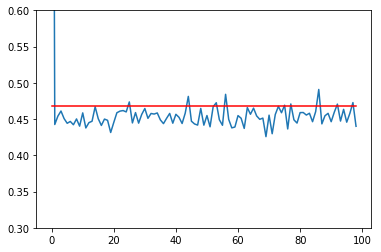

In [7]:
plt.plot(losses_1["big_eval_avg_distance"])
plt.plot([losses_1["avg_distance_empirical"] for _ in range(len(losses_1["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.6])

(0.1, 0.3)

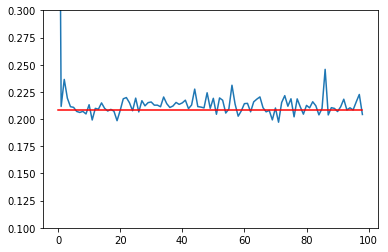

In [10]:
plt.plot(losses_1["big_eval_std_distance"])
plt.plot([losses_1["std_distance_empirical"] for _ in range(len(losses_1["big_eval_std_distance"]))], c="red")
plt.ylim([0.1,0.3])

# Run 2

In [11]:
losses_2 = joblib.load("results/goal_cond/from_start_standard_2/losses.pkl")

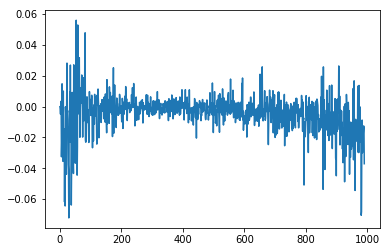

In [12]:
plt.plot(losses_2["D"][::1000])

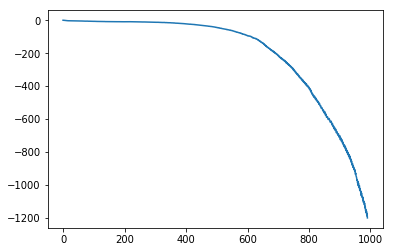

In [13]:
plt.plot(losses_2["G"][::200])

(0.3, 0.6)

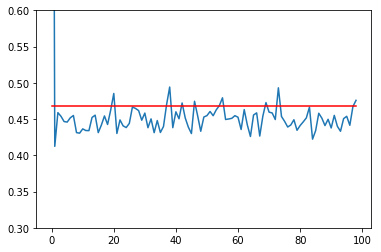

In [14]:
plt.plot(losses_2["big_eval_avg_distance"])
plt.plot([losses_2["avg_distance_empirical"] for _ in range(len(losses_2["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.6])

(0.1, 0.3)

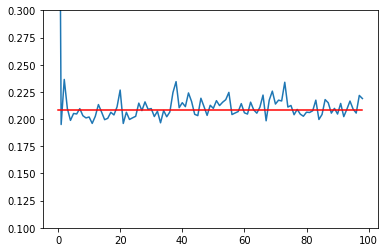

In [15]:
plt.plot(losses_2["big_eval_std_distance"])
plt.plot([losses_2["std_distance_empirical"] for _ in range(len(losses_2["big_eval_std_distance"]))], c="red")
plt.ylim([0.1,0.3])

# Run 3

In [16]:
losses_3 = joblib.load("results/goal_cond/from_start_standard_3/losses.pkl")

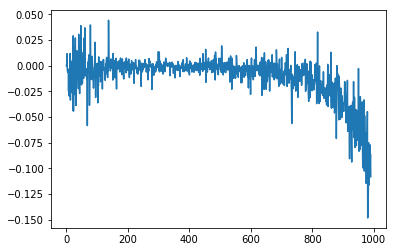

In [17]:
plt.plot(losses_3["D"][::1000])

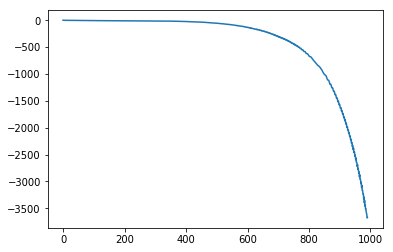

In [18]:
plt.plot(losses_3["G"][::200])

(0.3, 0.6)

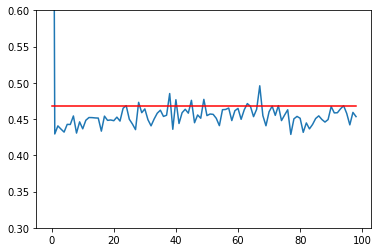

In [19]:
plt.plot(losses_3["big_eval_avg_distance"])
plt.plot([losses_3["avg_distance_empirical"] for _ in range(len(losses_3["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.6])

(0.1, 0.3)

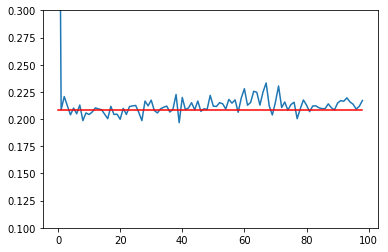

In [20]:
plt.plot(losses_3["big_eval_std_distance"])
plt.plot([losses_3["std_distance_empirical"] for _ in range(len(losses_3["big_eval_std_distance"]))], c="red")
plt.ylim([0.1,0.3])

Let's just look at run 1

In [2]:
from networks.networks import Generator_alt
state_dim = 3
latent_dim = 64
tau = 5
device = "cuda"
netG = Generator_alt(state_dim, latent_dim, state_dim, batch_norm=True, hidden_sizes=[128, 256, 512], goal_dim=state_dim, cond_on_goal=True).to(device)
dict_G, _ = joblib.load("results/goal_cond/from_start_standard/parameters.pkl")
netG.load_state_dict(dict_G)
netG.eval()

Generator_alt(
  (blocks): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=70, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=134, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=262, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (out_layer): Linear(in_features=518, out_features=3, bias=True)
)

<IPython.core.display.Javascript object>


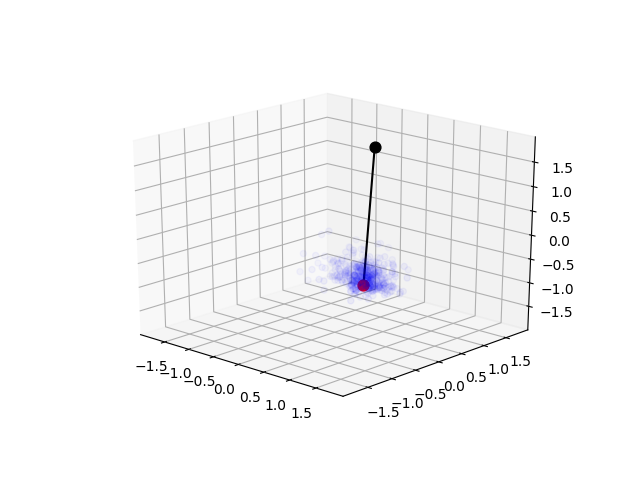

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(-2, 2)

In [5]:
num_gen_states = 500
state = np.array([-0.00934646,  0.63374764, -1.1993216 ])
goal = np.array([-0.8914087,  1.8443041,  1.1627929])
state_in = torch.tensor(state, dtype=torch.float32, device="cuda").view(1,-1).repeat(num_gen_states, 1)
goal_in = torch.tensor(goal, dtype=torch.float32, device="cuda").view(1,-1).repeat(num_gen_states, 1)
z = torch.randn(state_in.size(0), latent_dim).to("cuda")
gen_target_states = netG(z, state_in, goal_in)
targets = gen_target_states.cpu().data.numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(state[0], state[1], state[2], s=60, c="red")
ax.scatter(goal[0], goal[1], goal[2], s=60, c="black")
ax.plot([state[0], goal[0]], [state[1], goal[1]], [state[2], goal[2]], c="black")
ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], c=[0,0,1,0.05])

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

<IPython.core.display.Javascript object>


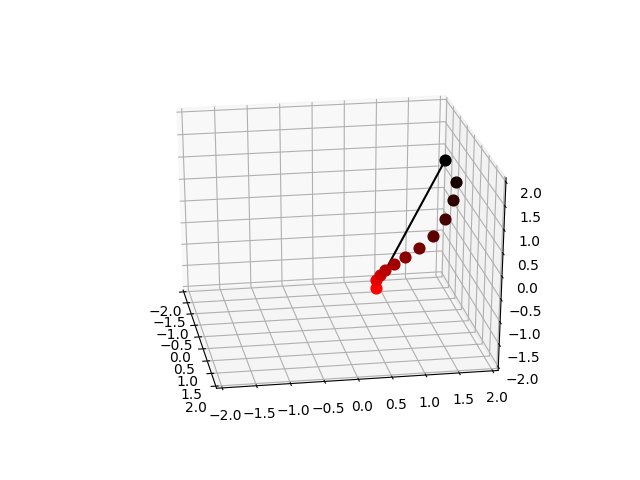

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(-2, 2)

In [16]:
from sklearn.cluster import KMeans
state = np.array([-0.00934646,  0.63374764, -1.1993216 ])
goal = np.array([-0.8914087,  1.8443041,  1.1627929])
num_gen_states = 5000
num_steps = 10
c_r = np.linspace(0, 1, num_steps+2)
colours = list(reversed([[c_r[i+1], 0, 0, 1] for i in range(num_steps)]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(state[0], state[1], state[2], s=60, c="red")
ax.scatter(goal[0], goal[1], goal[2], s=60, c="black")
ax.plot([state[0], goal[0]], [state[1], goal[1]], [state[2], goal[2]], c="black")

state_in = torch.tensor(state, dtype=torch.float32, device="cuda").view(1,-1).repeat(num_gen_states, 1)
goal_in = torch.tensor(goal, dtype=torch.float32, device="cuda").view(1,-1).repeat(num_gen_states, 1)

for ts in range(num_steps):
    z = torch.randn(state_in.size(0), latent_dim).to("cuda")
    gen_target_states = netG(z, state_in, goal_in)
    k_means = KMeans(n_clusters=1)
    k_means.fit(gen_target_states.cpu().data.numpy())
    n_state = (k_means.cluster_centers_).reshape(-1)
    #gen_states = gen_target_states.cpu().data.numpy()
    #ax.scatter(gen_states[:,0], gen_states[:,1], gen_states[:,2], c=[0,0,1,0.05], s=25)
    ax.scatter(n_state[0], n_state[1], n_state[2], s=60, c=colours[ts])
    state_in = torch.tensor(n_state, dtype=torch.float32, device="cuda").view(1,-1).repeat(num_gen_states, 1)
    
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

<IPython.core.display.Javascript object>


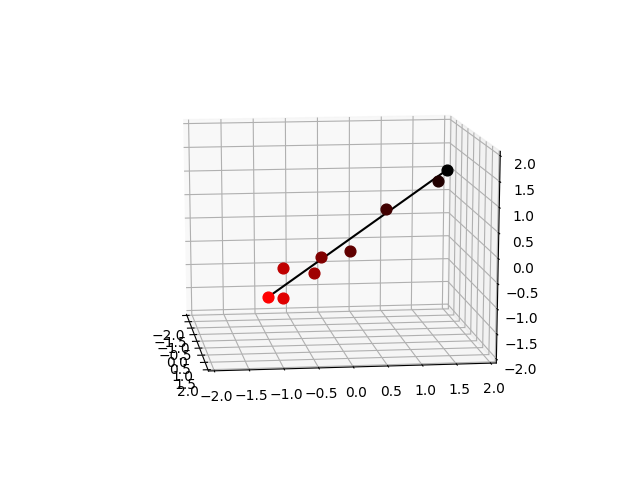

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

7


(-2, 2)

In [52]:
num_trajs = 1000
max_steps = 15
dist_threshold = 0.1
min_successes_to_terminate = 1

#start_state = np.array([-0.00934646,  0.63374764, -1.1993216 ])
start_state = np.array([-0.00934646,  -1.0, -1.1993216 ])
end_goal = np.array([-0.8914087,  1.8443041,  1.1627929])
goals = torch.tensor(end_goal, dtype=torch.float32, device="cuda").view(1,-1).repeat(num_trajs, 1)

saved_start_states = []
curr_start_state = start_state.copy()
full_steps = 0

while full_steps < max_steps:
    states = torch.tensor(curr_start_state, dtype=torch.float32, device="cuda").view(1,-1).repeat(num_trajs, 1)
    steps_from_this_state = 0
    first_gen_states = netG(torch.randn(states.size(0), latent_dim).to(device), states, goals)
    goal_dists = (first_gen_states-goals).norm(dim=-1)
    if torch.sum(goal_dists < dist_threshold) >= min_successes_to_terminate:
        break
    steps_from_this_state = 1
    prev_states = first_gen_states
    while steps_from_this_state < max_steps:
        next_states = netG(torch.randn(states.size(0), latent_dim).to(device), prev_states, goals)
        goal_dists = (next_states-goals).norm(dim=-1)
        if torch.sum(goal_dists < dist_threshold) >= min_successes_to_terminate:
            inds = np.where(goal_dists.cpu().data.numpy() > dist_threshold)[0]
            state_dists = (next_states-prev_states).norm(dim=-1)
            state_dists[inds] = float('inf')
            ind_to_add = torch.argmin(state_dists)
            curr_start_state = first_gen_states[ind_to_add, :].cpu().data.numpy()
            saved_start_states.append(curr_start_state.copy())
            full_steps += 1
            break
        prev_states = next_states
        steps_from_this_state += 1
    if steps_from_this_state >= max_steps:
        print("Could not find a route within the given number of trajectories")
        break
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(start_state[0], start_state[1], start_state[2], s=60, c="red")
ax.scatter(end_goal[0], end_goal[1], end_goal[2], s=60, c="black")
ax.plot([start_state[0], end_goal[0]], [start_state[1], end_goal[1]], [start_state[2], end_goal[2]], c="black")
c_r = np.linspace(0, 1, len(saved_start_states)+2)
colours = list(reversed([[c_r[i+1], 0, 0, 1] for i in range(len(saved_start_states))]))
for i, state in enumerate(saved_start_states):
    ax.scatter(state[0], state[1], state[2], s=60, c=colours[i])
    
print(len(saved_start_states))
    
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)